In [26]:
from pandas import read_pickle
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = read_pickle("datasets/pima-data.pkl")

In [3]:
# inputs e classes
X = df.values[:,0:8]
Y = df.values[:,8]

In [4]:
num_folds = 10
seed = 7

In [10]:
models = []
models.append(("LB", LogisticRegression(solver='lbfgs', max_iter=400)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", DecisionTreeClassifier()))
models.append(("CART", SVC()))


In [34]:
# avaliando cada modelo em um loop
results = []
names = []

In [35]:
for name, model in models:
    kfold = KFold(num_folds, shuffle=True, random_state = seed)
    cv_results = cross_val_score(model, X, Y, cv= kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LB: 0.772163 (0.049684)
LDA: 0.766969 (0.047966)
NB: 0.759142 (0.038960)
KNN: 0.710988 (0.050792)
SVM: 0.694173 (0.051597)
CART: 0.760458 (0.034712)


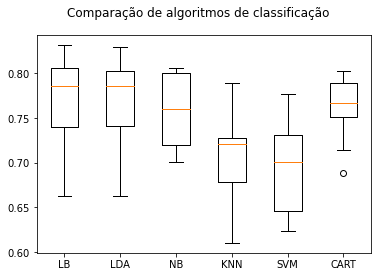

In [39]:
# comparação de algoritmos com boxplot
fig = plt.figure()
fig.suptitle("Comparação de algoritmos de classificação")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
results

[array([0.83116883, 0.74025974, 0.74025974, 0.80519481, 0.79220779,
        0.77922078, 0.66233766, 0.80519481, 0.82894737, 0.73684211]),
 array([0.80519481, 0.75324675, 0.71428571, 0.79220779, 0.79220779,
        0.77922078, 0.66233766, 0.80519481, 0.82894737, 0.73684211]),
 array([0.80519481, 0.71428571, 0.7012987 , 0.80519481, 0.79220779,
        0.75324675, 0.71428571, 0.76623377, 0.80263158, 0.73684211]),
 array([0.72727273, 0.71428571, 0.61038961, 0.72727273, 0.7012987 ,
        0.72727273, 0.66233766, 0.77922078, 0.78947368, 0.67105263]),
 array([0.71428571, 0.63636364, 0.62337662, 0.67532468, 0.68831169,
        0.71428571, 0.62337662, 0.75324675, 0.77631579, 0.73684211]),
 array([0.79220779, 0.75324675, 0.71428571, 0.79220779, 0.77922078,
        0.77922078, 0.68831169, 0.75324675, 0.80263158, 0.75      ])]